 <h1 align="center"> Support Vector Machines</h1>

SVMs are a powerful class of supervised learning algorithms for classification and regression problems. In the context of classification, SVMs can be viewed as maximum margin linear classifiers. 

The SVM uses an objective which explicitly encourages low out-of-sample error (good generalization performance). The $D$ dimensional data are divided into classes by maximizing the margin between the hyperplanes for the classes.

Note that we assume the two classes in the data are linearly separable. Later, for non-linear boundaries, we will use the kernel trick to exploit higher (possibly infinite) dimensional $z$-spaces, where the classes are linearly separable, find the support vectors in this space and map it back to the dimensionality of our problem.

## Linearly separable classes:

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

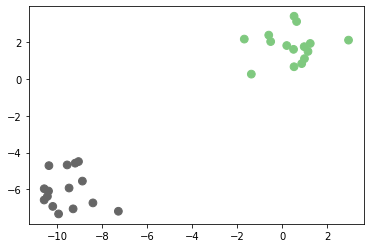

In [45]:
# synthetic data
from sklearn.datasets.samples_generator import make_blobs
# std defines intermixing of points; more std, more intermixing
# Y is class labels (as 0 or 1), X is data
X, Y = make_blobs(n_samples=30, centers=2, random_state=101, cluster_std=1)
# c is color, s is size
plt.scatter(X[:,0], X[:,1],c=Y,s=60,cmap='Accent')

In [46]:
[x for x in zip(list(X),list(Y))].__len__()

30

The linear classifiers we know will draw a straight line between the classes. With this example, we could do this by hand. But what should strike you is that there is more than one decision boundary (lines) that can achieve minimum in-sample error.  Let's plot them below.

## Many possible separators:

In [47]:
xfit = np.linspace(-12,4)
len(list(xfit))

50

(-8.0, 4.0)

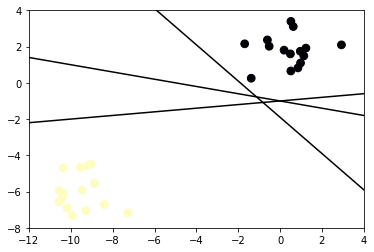

In [48]:
plt.scatter(X[:,0], X[:,1],c=Y,s=60,cmap='magma')

# y = m*x+c
for m, c in [(-1,-1.9), (0.1,-1), (-0.2,-1)]:
  plt.plot(xfit, m*xfit+c,'k')

plt.xlim(-12,4)
plt.ylim(-8,4)

## Maximum margin linear classifiers:

For a hyperplane defined by weight $w$ and bias $b$, a linear discriminant is given by:

$$w^T x + b \left\{\begin{matrix} \geq 0\ class +1& \\ <0\ class -1 \end{matrix}\right.$$

In the above plot, we notice that for a point $x$ that is close the decision boundary at $w^T x +b =0$, a small change in $x$ can lead to a change in classification. Now assuming that the data is linearly separable, we impose that for the training data, the decision boundary should be separated from the data by some finite amount $\epsilon ^2$:

$$w^T x + b \left\{\begin{matrix} \geq \epsilon^2\ class +1& \\ <-\epsilon^2\ class -1 \end{matrix}\right.$$

For the inequality above, we conveniently set $\epsilon = 1$ so that a point $x_+$ from class +1 that is closest to the decision boundary satisfies

 $$w^T x_+ + b =1$$

and a point $x_-$ from class -1 that is closest to the decision boundary satisfies

 $$w^T x_- + b =-1$$

## Plotting the margins:

(-8.0, 4.0)

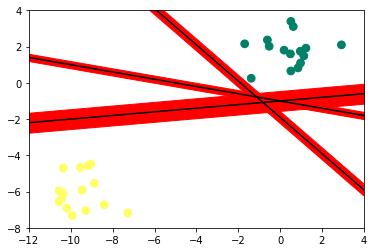

In [49]:
plt.scatter(X[:,0], X[:,1],c=Y,s=60,cmap='summer')

# y = m*x+c
for m, c, margin in [(-1,-1.9,0.33), (0.1,-1,0.55), (-0.2,-1,0.2)]:
  yfit = m*xfit+c
  # k means black
  plt.plot(xfit, yfit,'k')
  # alpha is transpaprency, 0 means full transparent
  plt.fill_between(xfit, y1=yfit-margin, y2=yfit+margin,
                   color='red', alpha=1)

plt.xlim(-12,4)
plt.ylim(-8,4)

When using SVMs, the decision boundary that maximizes this *margin* is chosen as the optimal model. 

## What is the hard margin?

From vector algebra the distance from the origin along the direction $w$ to a point $x$ is given by

$$\frac{w^T x}{\sqrt{w^T w}}$$

The $margin$ between the hyperplanes for the classes is the difference between the two distances along the direction of $w$ which is

$$\frac{w^T x}{\sqrt{w^T w}}(x_+ - x_-) = \frac{2}{\sqrt{w^T w}}$$

To maximize the the distance between two hyperplanes, we need to minimise the length $w^T w$. We know that for each $x^n$ we have a corresponding class label $y^n \in \left \{ +1, -1 \right \}$. So to classify the training labels correctly and maximize this margin, the optimzation problem is equivalent to:

$minimize\ \frac{1}{2}w^Tw$ subject to the constraints  $y^n(w^Tx^n +b)\geq 1$, and $n =1,..., N.$

Notice that this formulation is a *quadratic programming* problem -- something we know how to work with. This is known as a hard margin SVM  due to the presence of the exact classification constraint "$\geq 1$", which means that the points used as support vectors exactly fall on the boundary of the margin.

# SVM in practice:

Using the data from before, let us now train an SVM model with Scikit-Learn's suppport vector classifier. We'll defer the discussion about kernels for later in the course. For the time being, we will use a `linear` kernel and set the `C` parameter to an arbitrarily large number.

In [50]:
from sklearn.svm import SVC
# kernels : https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html ; default rbf
# C is regularization param; more C, less regularization
svc = SVC()
svc.fit(X,Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Visualizing the SVM decision boundaries:

In [0]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

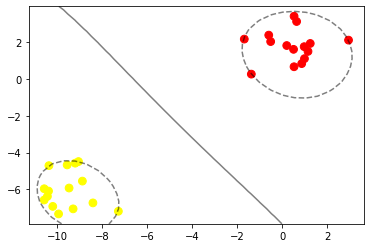

In [52]:
plt.scatter(X[:,0],X[:,1],c=Y, s=60, cmap='autumn')
plot_svc_decision_function(svc)

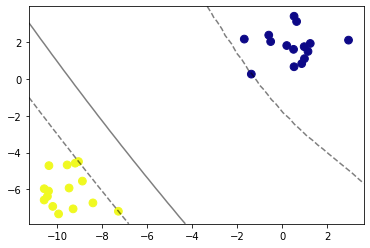

In [53]:
svc = SVC(kernel='poly')
svc.fit(X,Y)
plt.scatter(X[:,0],X[:,1],c=Y, s=60, cmap='plasma')
plot_svc_decision_function(svc)

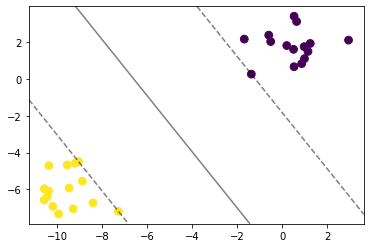

In [57]:
svc = SVC(kernel='linear')
svc.fit(X,Y)
plt.scatter(X[:,0],X[:,1],c=Y, s=60, cmap='viridis')
plot_svc_decision_function(svc)

In [58]:
svc.support_vectors_  # coordinates of support vectors

array([[-1.37811338,  0.25423232],
       [-9.04448516, -4.48554835],
       [-7.27566903, -7.17982573]])

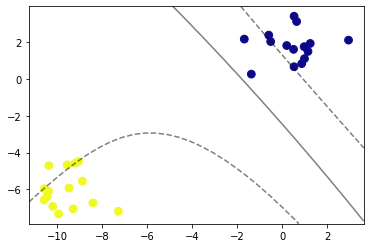

In [55]:
svc = SVC(kernel='sigmoid')
svc.fit(X,Y)
plt.scatter(X[:,0],X[:,1],c=Y, s=60, cmap='plasma')
plot_svc_decision_function(svc)

Best seems to be with 'linear'

The bold line dividing the data maximizes the margin between the two sets of points. Count the number of training points just touching the margin. These three points are known as the *support vectors*. These points exactly satisfying the margin are stored in the `support_vectors_` attribute of the classifier in Scikit-Learn.

## Discussion:

In the hard-margin SVM classifier, only the position of the support vectors matter. Points away from the margin which are not on the correct side don't change the fit! This is because these points do not contribute to the loss function used to fit the model. 